In [1]:
import os 
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebookº
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC')

## Carga de información

In [1]:
laliga2122 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga21 22.xlsx', )
laliga2021 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga20 21.xlsx', )
laliga1920 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga19 20.xlsx', )
laliga1819 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga18 19.xlsx', )
laliga1718 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga17 18.xlsx', )
laliga1617 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga16 17.xlsx', )
seg2122 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 21 22.xlsx', )
seg2021 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 20 21.xlsx', )
seg1920 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 19 20.xlsx', )
seg1819 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 18 19.xlsx', )
seg1718 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC\MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 17 18.xlsx', )
seg1617 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC\MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 16 17.xlsx', )


<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:12: SyntaxWarning: invalid escape sequence '\M'
<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:12: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Tomás Barrientos\AppData\Local\Temp\ipykernel_18128\3597788924.py:11: SyntaxWarning: invalid escape sequence '\M'
  seg1718 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC\MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 17 18.xlsx', )
C:\Users\Tomás Barrientos\AppData\Local\Temp\ipykernel_18128\3597788924.py:12: SyntaxWarning: invalid escape sequence '\M'
  seg1617 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC\MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 16 17.xlsx', )
C:\Users\Tomás Barrientos\AppData\Local\Temp\ipykernel_18128\3597788924.py:11: SyntaxWarning: invalid escape sequence '\M'
  seg1718 =  pd.read_excel('H:/Mi unidad/Diplomado - Introduc

NameError: name 'pd' is not defined

In [5]:
# Concatenar los DataFrames de La Liga utilizando pd.concat
laliga = pd.concat([laliga2122, laliga2021, laliga1920, laliga1819, laliga1718, laliga1617], ignore_index=True)
laliga = laliga.dropna(how='all')
laliga = laliga.loc[:, ['Wk','Date','Local','xG','Score','xG.1','Visitante', 'Attendance']]
laliga['Attendance'] = laliga['Attendance'] * 1000


In [6]:
def total_goles(string):
    goles = string.split('–')
    total_goles = int(goles[0])+int(goles[1])
    return total_goles
laliga['Total de goles']= laliga['Score'].apply(total_goles)

In [7]:
def torneo(año,mes):
    if ((año==2016) & (mes<=12)|(año==2017) & (mes<8)):
        return '16/17'
    elif ((año==2017) & (mes<=12)|(año==2018) & (mes<8)):
        return '17/18'
    elif ((año==2018) & (mes<=12)|(año==2019) & (mes<8)):
        return '18/19'
    elif ((año==2019) & (mes<=12)|(año==2020) & (mes<9)):
        return '19/20'
    elif ((año==2020) & (mes<=12)|(año==2021) & (mes<8)):
        return '20/21'
    elif ((año==2021) & (mes<=12)|(año==2022) & (mes<8)):
        return '21/22'

    
laliga['Año'] = laliga['Date'].dt.year
laliga['Mes'] = laliga['Date'].dt.month
laliga['Temporada'] = laliga.apply(lambda x: torneo(x['Año'],x['Mes']),axis = 1)

## Análisis de victorias

Crearemos columnas para analizar los resultados de los partidos de cada torneo. Primero, una columna que nos diga si ganó el equipo local o visitante y otra columna con el nombre del equipo que ganó

In [8]:
def golesvisita(marcador):
    goles = marcador.split('–')
    return int(goles[1])

def goleslocal(marcador):
    goles = marcador.split('–')
    return int(goles[0])

laliga['Goles Local'] = laliga['Score'].apply(goleslocal)
laliga['Goles Visitante'] = laliga['Score'].apply(golesvisita)

In [9]:
def resultado(string):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return 'Local'
    if int(goles[0])<int(goles[1]):
        return 'Visitante'
    else: 
        return 'Empate'
    
def resultado_equipo(string, local, visita):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return local
    if int(goles[0])<int(goles[1]):
        return visita
    else: 
        return 'Empate'
laliga['Resultado'] = laliga['Score'].apply(resultado)
laliga['Ganador'] = laliga.apply(lambda x: resultado_equipo(x['Score'],x['Local'],x['Visitante']),axis=1)

Ahora, podemos estudiar la cantidad de partidos que ganó el equipo local, visita o fue empate por cada torneo.


In [10]:
condicion_predominante = laliga.groupby(['Temporada','Resultado'])['Wk'].count().reset_index()
condicion_predominante = condicion_predominante.set_axis(
['Temporada', 'Resultado','Cantidad'], axis='columns')

condicion_predominante

,Temporada,Resultado,Cantidad
0,16/17,Empate,89
1,16/17,Local,181
2,16/17,Visitante,110
3,17/18,Empate,86
4,17/18,Local,179
5,17/18,Visitante,115
6,18/19,Empate,110
7,18/19,Local,168
8,18/19,Visitante,102
9,19/20,Empate,105


Si solo nos interesa el histórico, sin considerar la diferencia por temporada, tenemos que :

In [11]:
cond_predominante_abs = laliga.groupby(['Resultado'])['Wk'].count().reset_index()
cond_predominante_abs = cond_predominante_abs.set_axis(
['Resultado','Cantidad'], axis='columns')

cond_predominante_abs

,Resultado,Cantidad
0,Empate,610
1,Local,1025
2,Visitante,645


In [12]:
fig1 = px.pie(cond_predominante_abs, values ='Cantidad', names ='Resultado', title='La Liga 2016-2022',
        color = 'Resultado', color_discrete_map={'Local':'royalblue', 'Visitante':'orangered',
        'Empate':'lightgreen'})

fig1.update_traces(textposition='inside', textinfo='percent+value')
fig1.show()

De donde se puede notar una clara tendencia a la victoria del equipo local.

## Más ganadores
Ahora, nos puede interesar saber los equipos que más han ganado durante las últimas 6 temporadas de la liga española.

In [13]:
mas_ganadores = laliga[laliga['Ganador']!= 'Empate'].groupby(['Ganador'])['Wk'].count().reset_index()
mas_ganadores = mas_ganadores.set_axis(['Equipo','Cantidad de victorias'], axis='columns')
mas_ganadores = mas_ganadores.sort_values(by= 'Cantidad de victorias', ascending = False)
mas_ganadores.head(3)

,Equipo,Cantidad de victorias
3,Barcelona,152
22,Real Madrid,149
2,Atlético Madrid,133


In [13]:

fig2 = px.pie(mas_ganadores, values = 'Cantidad de victorias', names = 'Equipo', title = "La Liga Result from 2016-2022 - Most Win Team",
    color = 'Equipo', color_discrete_sequence= px.colors.qualitative.Light24)
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.show()

## Cantidad de partidos con x goles por torneo 

También, nos puede interesar la cantidad de goles que se han realizado en un torneo:

In [14]:
def intervalos(score):
    goles = score.split('–')
    total_goles = int(goles[0])+int(goles[1])
    if total_goles <1:
        return '0'
    elif total_goles<2:
        return '1'
    elif total_goles<3:
        return '2'
    elif total_goles<4:
        return '3'
    elif total_goles>=4:
        return '4+'
laliga['Clasificación goles'] = laliga['Score'].apply(intervalos)

In [16]:
cant_goles_pp = laliga.groupby(['Temporada','Clasificación goles'])['Date'].count().reset_index()
cant_goles_pp = cant_goles_pp.set_axis(['Temporada','Cantidad de goles por partido','Cantidad de partidos'],
                axis= 'columns')
cant_goles_pp.head(10)

,Temporada,Cantidad de goles por partido,Cantidad de partidos
0,16/17,0,27
1,16/17,1,57
2,16/17,2,82
3,16/17,3,86
4,16/17,4+,128
5,17/18,0,28
6,17/18,1,82
7,17/18,2,78
8,17/18,3,84
9,17/18,4+,108


## Visualización de la asistencia de público


In [17]:
total_asist =laliga.groupby('Temporada')['Attendance'].agg('sum').reset_index()
fig2 = px.line(total_asist, x = 'Temporada', y = 'Attendance', 
title = 'Asistencia total por temporada de La Liga entre 2016-2022', line_shape = 'spline')
fig2.show()


Se puede observar como afecto la pandemia a la asistencia de público durante los años 2020 y 2021. Recordemos que la temporada 19/20 se vio afectada en la recta final (finales de febrero, principio de marzo) y la temporada 20/21 prácticamente completa.

## Visualización goles con gráfico de barras

Ahora, si queremos analizar los goles realizados por cada equipo en ambas condiciones, es decir, local y visita, podemos graficarlo en un gráfico de barras:

In [18]:
test1 = laliga.groupby('Local')['Goles Local'].agg('sum').reset_index()
test1 = test1.rename(columns={"Local": "Equipo", 'Goles Local': 'Total de goles históricos de Local'})

test2 = laliga.groupby('Visitante')['Goles Visitante'].agg('sum').reset_index()
test2 = test2.rename(columns = {'Goles Visitante': 'Total de goles históricos de Visitante'})

result = pd.concat([test1, test2], axis=1)
dt = result.drop(['Visitante'], axis=1)

fig3 = px.bar(dt, x = "Equipo", y =['Total de goles históricos de Local','Total de goles históricos de Visitante'],
    title = 'Total de goles desde 2016-2022 Equipos de LaLiga')
fig3.show()

Los últimos 6 campeonatos se han repartido los 3 primeros lugares entre Real Madrid, Barcelona y Atlético Madrid. El Real Madrid se ha consagrado campeón en 3 oportunidades, Barcelona 2 y At Madrid 1. Llama la atención que Villarreal y Sevilla tengan una cantidad de goles similares al Atlético de Madrid a pesar de no haber estado en el podio de ninguno de estos torneos

Ejemplo con matplotlib: 

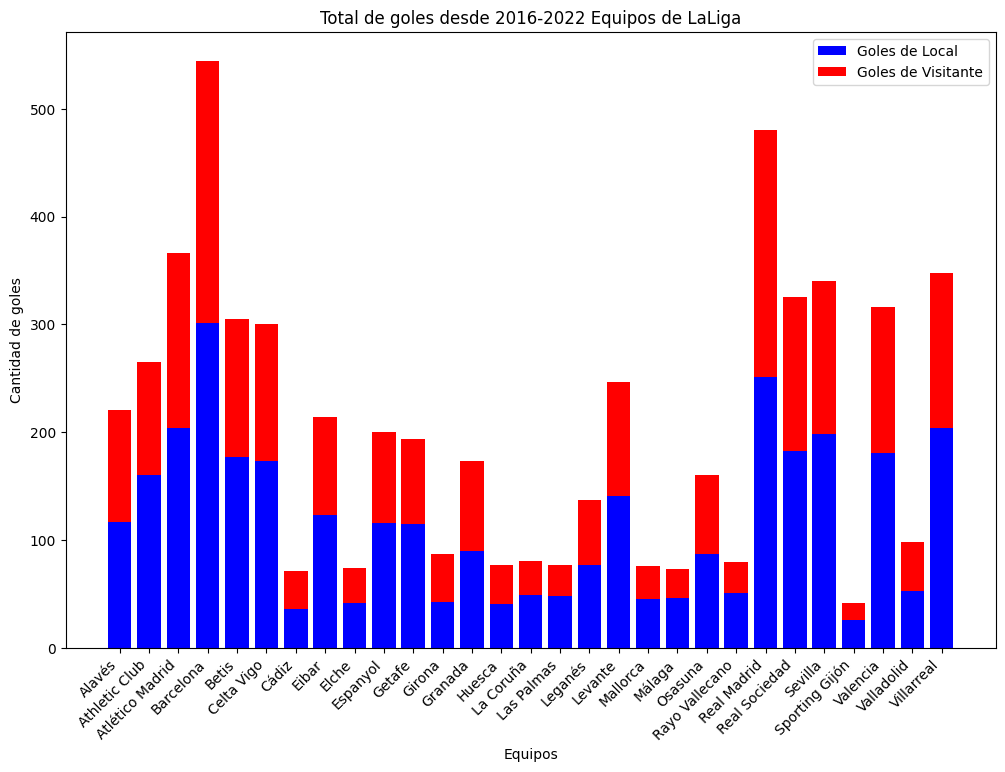

In [19]:
fig, ax = plt.subplots(figsize = (12,8))

x=dt['Equipo']
label2="Goles de Visitante"
label1="Goles de Local"
y1= dt['Total de goles históricos de Local']
y2= dt['Total de goles históricos de Visitante']

plt.bar(x=x, height=y1, label=label1, color="blue")
plt.bar(x=x, height=y2,bottom=y1 ,label= label2, color="red")
plt.xticks(rotation=45, ha="right")


plt.title("Total de goles desde 2016-2022 Equipos de LaLiga")
plt.xlabel("Equipos")
plt.ylabel("Cantidad de goles")
plt.legend()

plt.show()

## Pregunta formativa 1
¿Cómo es el código que construye un Dataframe de asistencia total por equipo durante las 6 temporadas?

In [20]:
total_asist_equipo =laliga.groupby('Local')['Attendance'].agg('sum').reset_index()
total_asist_equipo = total_asist_equipo.rename(columns={'Local':'Equipo'})
total_asist_equipo = total_asist_equipo.sort_values(by= 'Attendance', ascending = False)

total_asist_equipo

,Equipo,Attendance
3,Barcelona,6272438.0
22,Real Madrid,5452011.0
2,Atlético Madrid,4834556.0
4,Betis,3847810.0
1,Athletic Club,3417075.0
26,Valencia,3213405.0
24,Sevilla,2974514.0
23,Real Sociedad,2120247.0
9,Espanyol,1735163.0
0,Alavés,1470820.0


## Pregunta formativa 2

In [21]:
test1 = laliga.groupby('Local')['Goles Local'].agg('sum').reset_index()
test1 = test1.rename(columns={"Local": "Equipo", 'Goles Local': 'Total de goles históricos de Local'})

test2 = laliga.groupby('Visitante')['Goles Visitante'].agg('sum').reset_index()
test2 = test2.rename(columns = {'Goles Visitante': 'Total de goles históricos de Visitante'})

result = pd.concat([test1, test2], axis=1)
dt = result.drop(['Visitante'], axis=1)
dt['Total goles histórico'] = dt['Total de goles históricos de Local'] +dt['Total de goles históricos de Visitante'] 


In [22]:
dff2 = dt.loc[:,['Equipo','Total goles histórico']]
dff2

,Equipo,Total goles histórico
0,Alavés,221
1,Athletic Club,265
2,Atlético Madrid,366
3,Barcelona,544
4,Betis,305
5,Celta Vigo,300
6,Cádiz,71
7,Eibar,214
8,Elche,74
9,Espanyol,200


## Pregunta formativa 3
¿Cuál de las siguientes alternativas corresponde a parte del código para graficar con un gráfico de barras la asistencia a los partidos?

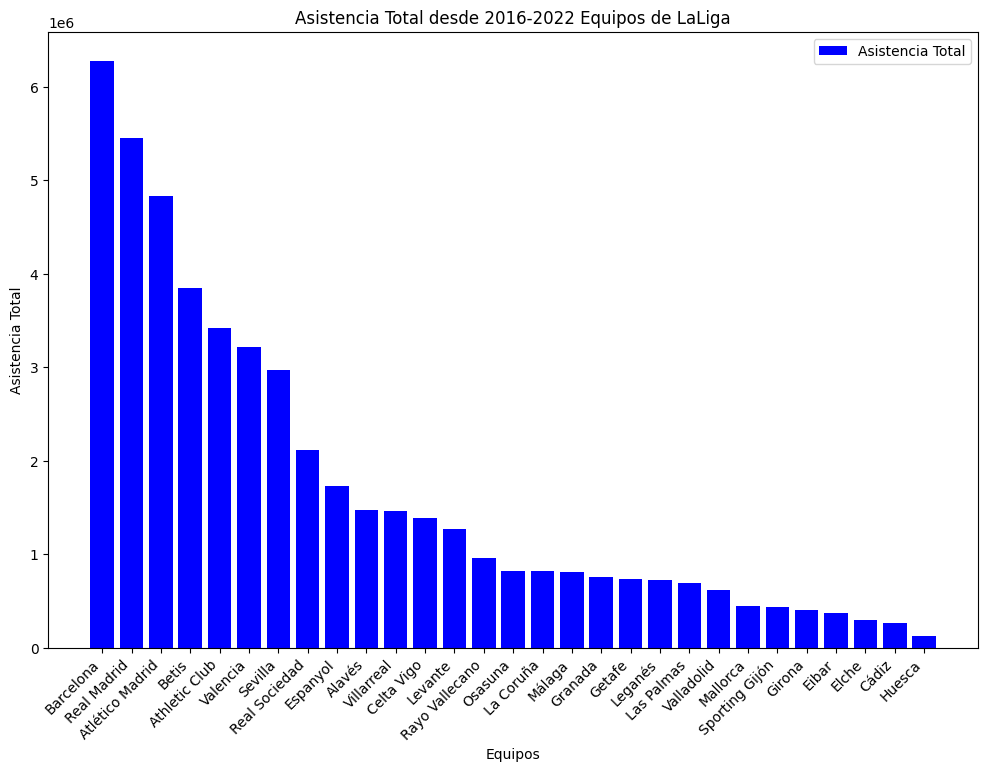

In [23]:
fig, ax = plt.subplots(figsize = (12,8))
x=total_asist_equipo['Equipo']
label1="Asistencia Total"
y1= total_asist_equipo['Attendance']
plt.bar(x=x, height=y1, label=label1, color="blue")
plt.xticks(rotation=45, ha="right")
plt.title("Asistencia Total desde 2016-2022 Equipos de LaLiga")
plt.xlabel("Equipos")
plt.ylabel("Asistencia Total")
plt.legend()
plt.show()

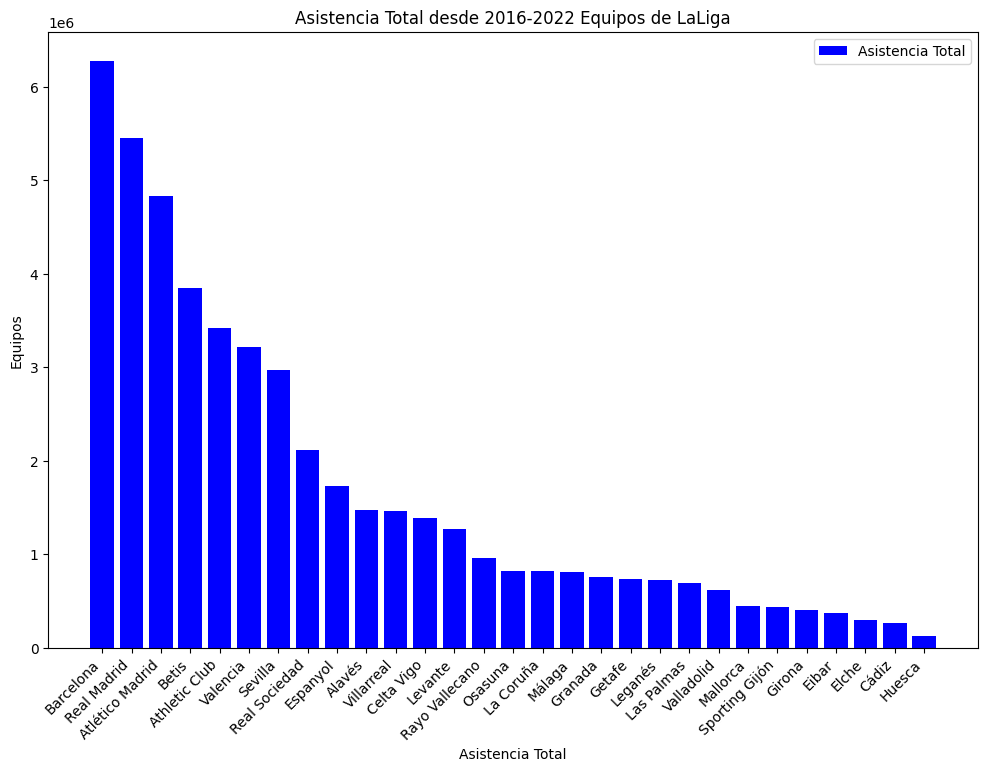

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
x=total_asist_equipo['Equipo']
label1="Asistencia Total"
y1= total_asist_equipo['Attendance']
plt.bar(x=x, height=y1, label=label1, color="blue")
plt.xticks(rotation=45, ha="right")
plt.title("Asistencia Total desde 2016-2022 Equipos de LaLiga")
plt.ylabel("Equipos")
plt.xlabel("Asistencia Total")
plt.legend()
plt.show()

## Pregunta formativa 4
¿Cuál de las siguientes alternativas corresponde al código que permite realizar un gráfico de torta con el total de goles convertidos por cada equipo de la liga en todas las temporadas?

In [32]:
figPF4 = px.pie(dff2, values = 'Total goles histórico', names = 'Equipo', title = "Total de Goles en La 
Liga 2016-2022", color = 'Equipo', color_discrete_sequence= px.colors.qualitative.Light24)
figPF4.update_traces(textposition='inside', textinfo='percent+label')
figPF4.show()

SyntaxError: unterminated string literal (detected at line 1) (3443144634.py, line 1)